In [47]:
import pandas as pd
import sklearn
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

LABELS = ["Normal", "Fraud"]

In [2]:
credit=pd.read_csv(r"C:\Users\LP1BZ\Desktop\ml\creditcard.csv")

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C:\Users\LP1BZ\AppData\Local\Temp\ipykernel_27136\2321181217.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes=pd.value_counts(credit['Class'], sort=True)


Text(0, 0.5, 'Frequency')

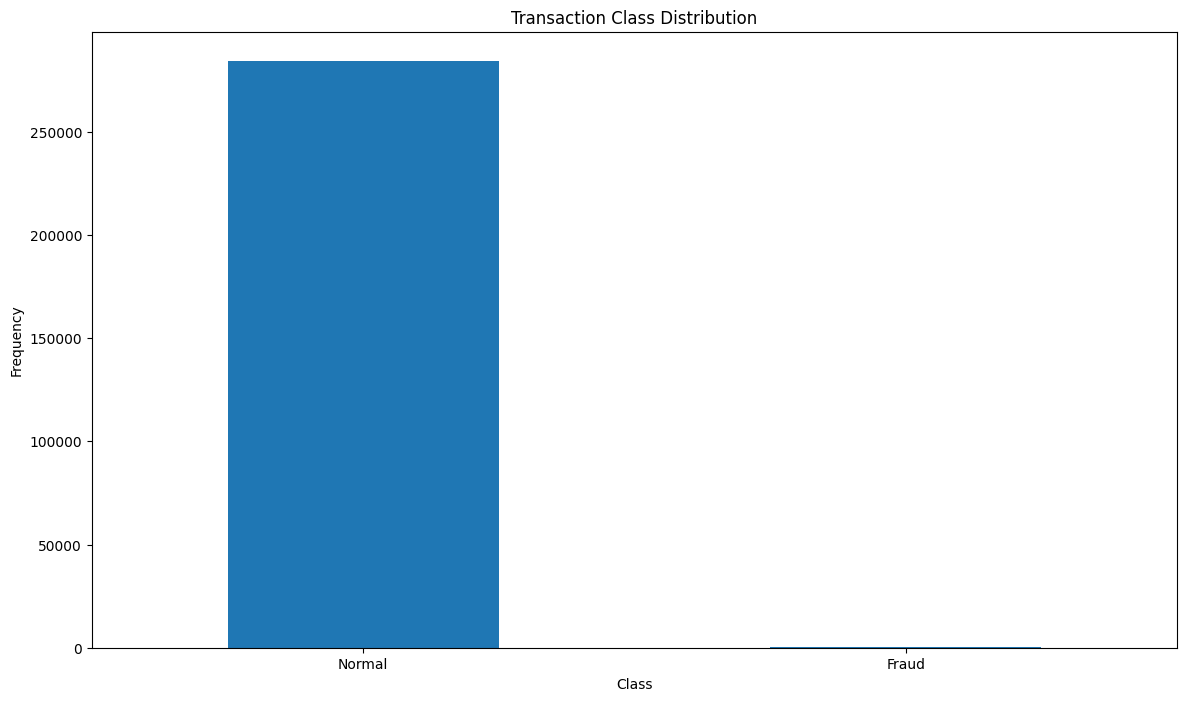

In [48]:
count_classes=pd.value_counts(credit['Class'], sort=True)

count_classes.plot(kind="bar", rot=0)
 
plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [5]:
legit=credit[credit.Class==0]

In [6]:
fraud=credit[credit.Class==1]

In [7]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

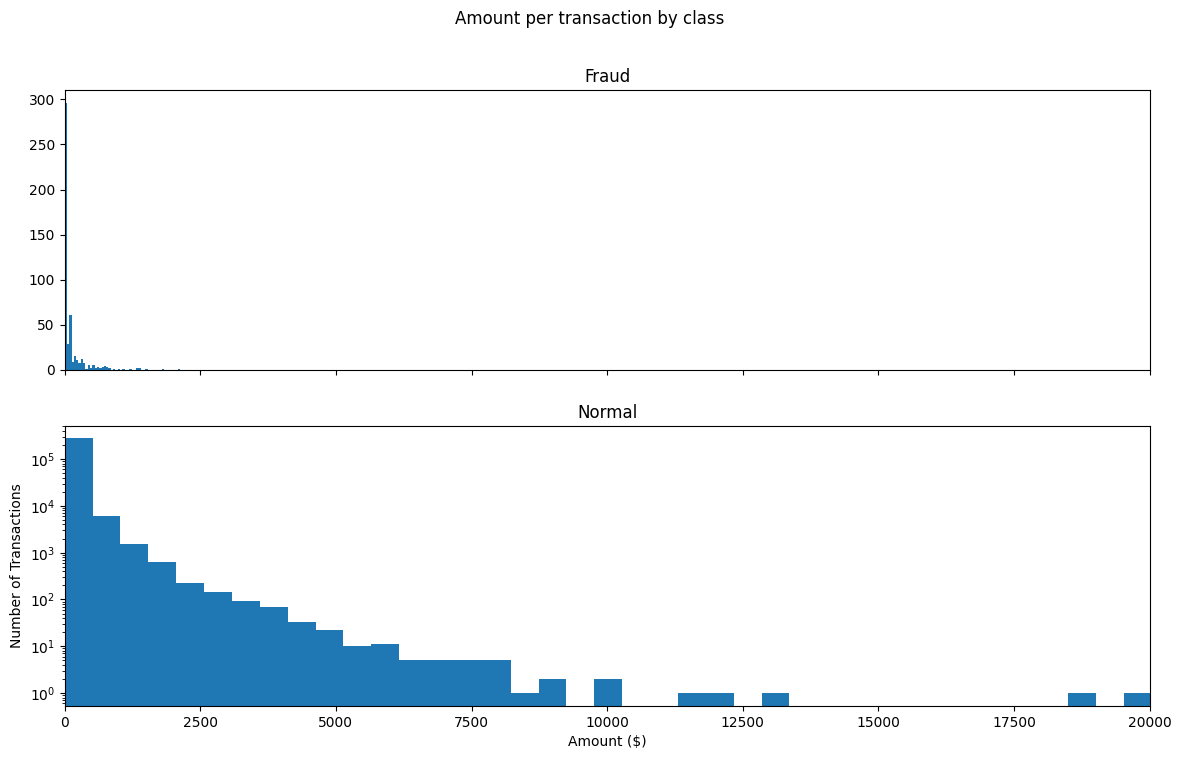

In [49]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [9]:
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [10]:
legit.shape

(284315, 31)

In [11]:
fraud.shape

(492, 31)

In [12]:
var=MinMaxScaler()
scaled_data=var.fit_transform(credit)
scaled_df=pd.DataFrame(scaled_data,columns=credit.columns)

In [13]:
scaled_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


In [14]:
scaled_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,0.548858,0.958434,0.767192,0.837625,0.251582,0.765753,0.263044,0.265414,0.785375,0.462934,...,0.580258,0.561460,0.510030,0.665435,0.382259,0.577903,0.425434,0.416506,0.313121,0.003437
1.0,0.467306,0.877224,0.805495,0.715537,0.453275,0.744502,0.248967,0.231430,0.791507,0.373865,...,0.584230,0.572983,0.510686,0.664835,0.368068,0.580233,0.433885,0.419659,0.314659,0.004757


In [15]:
X=scaled_df.drop(columns='Class',axis=1)
Y=scaled_df['Class']

In [16]:
X.shape

(284807, 30)

In [17]:
Y.shape

(284807,)

In [18]:
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [19]:
smote=SMOTE(random_state=42)

In [20]:
X_resampled,Y_resampled=smote.fit_resample(X_train, Y_train)

In [21]:
X_resampled.shape

(454902, 30)

In [22]:
X_train.shape

(227845, 30)

In [23]:
Y_train.value_counts()

Class
0.0    227451
1.0       394
Name: count, dtype: int64

In [24]:
model=LogisticRegression()

In [25]:
modell=LogisticRegression()

In [26]:
model.fit(X_train,Y_train)

LogisticRegression()

In [27]:
modell.fit(X_resampled,Y_resampled)

LogisticRegression()

In [28]:
X_test_prediction=model.predict(X_test)

In [29]:
testing_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [30]:
X_test_predictionn=modell.predict(X_test)

In [31]:
testing_data_accuracyy=accuracy_score(X_test_predictionn, Y_test)

In [32]:
print("Accuracy testing data: ",testing_data_accuracy)

Accuracy testing data:  0.9989993328885924


In [33]:
print("Accuracy testing data: ",testing_data_accuracyy)

Accuracy testing data:  0.9769671008742671


In [ ]:
#without smote Logistic regression

In [34]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.84      0.52      0.64        98

    accuracy                           1.00     56962
   macro avg       0.92      0.76      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#with smote Logistic regression

In [35]:
print(classification_report(Y_test,X_test_predictionn))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     56864
         1.0       0.07      0.94      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
#without smote Random forest

In [50]:
rfc=RandomForestClassifier(n_estimators=100, random_state=2)

In [51]:
rfc.fit(X_train, Y_train)           

RandomForestClassifier(random_state=2)

In [54]:
Y_test_predicted=rfc.predict(X_test)


In [55]:

print(classification_report(Y_test,Y_test_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#with smote Random forest

In [ ]:
rfcc=RandomForestClassifier(n_estimators=100, random_state=2)


In [65]:
rfcc.fit(X_resampled, Y_resampled) 


RandomForestClassifier(random_state=2)

In [66]:
Y_test_predictedd=rfcc.predict(X_test)

In [67]:
print(classification_report(Y_test,Y_test_predictedd))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.85      0.86      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

